In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, 
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("recycling waste",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")

Found 8369 images belonging to 9 classes.


In [3]:
#lets create a model
#im going to use VGG16 models parameter to solve this problem

from tensorflow.keras.applications.vgg16 import VGG16

#here im going to take input shape , weights and bias from imagenet and include top false field
#i want to add input , flatten and output layer by self

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top=False)

In [4]:
#Now vgg16 weights are already train so i don't want to train that weights again
# so let's make trainable = False

for layer in vgg16.layers:
    layer.trainable = False

In [5]:
#Let's add flatten layer or let's connect VGG16 with our own flattern layer

from tensorflow.keras import layers

x=layers.Flatten()(vgg16.output)

In [6]:
# now let's add output layers or prediction layer

prediction = layers.Dense(units = 9, activation = "softmax")(x)

#creating a model object

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
# now let's compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

result=model.fit_generator(train_data, epochs = 28, steps_per_epoch=len(train_data))

C:\Users\vsn01\AppData\Local\Temp\ipykernel_40812\65190777.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result=model.fit_generator(train_data, epochs = 28, steps_per_epoch=len(train_data))


Epoch 1/28
262/262 [==============================] - 2223s 8s/step - loss: 1.9745 - accuracy: 0.3295
Epoch 2/28
262/262 [==============================] - 2218s 8s/step - loss: 1.5791 - accuracy: 0.4600
Epoch 3/28
262/262 [==============================] - 1797s 7s/step - loss: 1.4840 - accuracy: 0.4904
Epoch 4/28
262/262 [==============================] - 5831s 22s/step - loss: 1.4058 - accuracy: 0.5182
Epoch 5/28
262/262 [==============================] - 1923s 7s/step - loss: 1.3414 - accuracy: 0.5406
Epoch 6/28
262/262 [==============================] - 8271s 32s/step - loss: 1.2849 - accuracy: 0.5592
Epoch 7/28
262/262 [==============================] - 3665s 14s/step - loss: 1.2717 - accuracy: 0.5661
Epoch 8/28
262/262 [==============================] - 2376s 9s/step - loss: 1.2015 - accuracy: 0.5888
Epoch 9/28
262/262 [==============================] - 8821s 34s/step - loss: 1.2109 - accuracy: 0.5849
Epoch 10/28
262/262 [==============================] - 1909s 7s/step - loss: 1

In [38]:
from tensorflow.keras.preprocessing import image
output_class = ["batteries", "clothes", "e-waste", "glass", "light blubs", "metal", "organic", "paper", "plastic"]

def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")


     

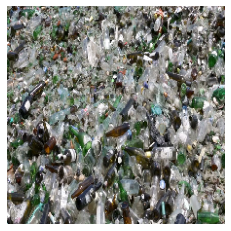

1/1 [==============================] - 4s 4s/step
Your waste material is  glass  with  99.79  % accuracy


In [44]:
waste_prediction(r"C:\Users\vsn01\recycle_waste\recycling waste\glass\10.jpg")


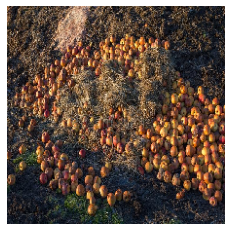

1/1 [==============================] - 1s 1s/step
Your waste material is  metal  with  74.47  % accuracy


In [56]:
waste_prediction(r"C:\Users\vsn01\recycle_waste\recycling waste\organic\compost-preparation-soil-apples-other-organic-waste-pile-garden-environmental-conservation-concept-145177906.jpg")

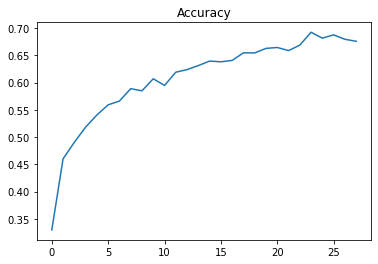

In [46]:
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()

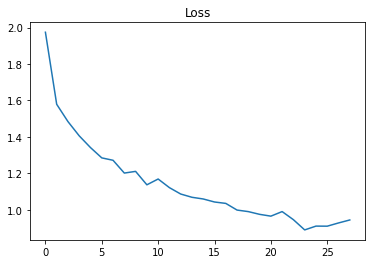

In [47]:
plt.title("Loss")
plt.plot(result.history["loss"])
plt.show()

In [55]:
model.save("classify_waste.h5")